# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML Project

In [13]:
df=pd.read_csv('C:/Users/aksin52/Documents/1. Learnbay Machine Learning Projects/insurance_renewal.csv')

In [14]:
df.shape

(9134, 23)

In [15]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [16]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

# Setting Display options to ensure feature name visibility

In [17]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [18]:
import warnings
warnings.filterwarnings('ignore')

# How many rows have missing ID ?

In [19]:
df['Customer'].isnull().sum()

0

# Drop ID Feature from the dataset

In [20]:
df=df.drop(['Customer'],axis=1)

In [ ]:
# Drop the following feature since we have 'Months Since Policy Inception'
# Effective To Date

In [21]:
df=df.drop(['Effective To Date'],axis=1)

In [ ]:
# Labeling the Target Variable (1/0)

In [22]:
df['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [23]:
df['Target']=np.where(df['Response']=="Yes",1,0)

In [24]:
df=df.drop(['Response'],axis=1)

# Defining Target and Independent Features

In [25]:
Y=df[['Target']]
X=df.drop(['Target'],axis=1)

# Get the Baseline Renewal Rate

In [26]:
Y.mean()

Target    0.143201
dtype: float64

# Split features into Numerical and Categorical

In [36]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [37]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [38]:
df_value_counts.columns=['feature_levels']
df_value_counts

,feature_levels
Customer Lifetime Value,8041
Income,5694
Monthly Premium Auto,202
Months Since Last Claim,36
Months Since Policy Inception,100
Number of Open Complaints,6
Number of Policies,9
Total Claim Amount,5106


In [39]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list].astype("object")
cat.dtypes

Number of Open Complaints    object
Number of Policies           object
dtype: object

In [40]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]

In [41]:
num.dtypes

Customer Lifetime Value          float64
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Total Claim Amount               float64
dtype: object

In [42]:
char=pd.concat([char,cat],axis=1,join="inner")

In [43]:
char.dtypes

State                        object
Coverage                     object
Education                    object
EmploymentStatus             object
Gender                       object
Location Code                object
Marital Status               object
Policy Type                  object
Renew Offer Type             object
Sales Channel                object
Vehicle Class                object
Vehicle Size                 object
Number of Open Complaints    object
Number of Policies           object
dtype: object

# Outlier Analysis of Numerical Features

In [44]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
1%,2230.433731,0.000000,61.000000,0.000000,1.000000,10.402835
5%,2475.109047,0.000000,62.000000,1.000000,4.000000,52.261227
10%,2661.757835,0.000000,64.000000,2.000000,10.000000,104.084855
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839


# Capping and Flooring of outliers

In [45]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [46]:
num=num.apply(lambda x : outlier_cap(x))

In [47]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,7913.817819,37645.405877,92.922448,15.097000,48.065141,430.551380
std,6344.938386,30355.858544,33.020850,10.073257,27.875048,273.819399
min,2230.433731,0.000000,61.000000,0.000000,1.000000,10.402835
1%,2230.539986,0.000000,61.000000,0.000000,1.000000,10.409413
5%,2475.109047,0.000000,62.000000,1.000000,4.000000,52.261227
10%,2661.757835,0.000000,64.000000,2.000000,10.000000,104.084855
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839


# Missing Value Analysis - Numerical

In [52]:
num.isnull().mean()

Customer Lifetime Value          0.0
Income                           0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Total Claim Amount               0.0
dtype: float64

# Missing Value Handling - Numerical Features (Imputation with Mean)

In [ ]:
# We are not performing this step since Missing Values are not present

# Missing Value Analysis- Categorical

In [53]:
char.isnull().mean()

State                        0.0
Coverage                     0.0
Education                    0.0
EmploymentStatus             0.0
Gender                       0.0
Location Code                0.0
Marital Status               0.0
Policy Type                  0.0
Renew Offer Type             0.0
Sales Channel                0.0
Vehicle Class                0.0
Vehicle Size                 0.0
Number of Open Complaints    0.0
Number of Policies           0.0
dtype: float64

# Missing Value Handling - Categorical Features (Imputation with Mode)

In [ ]:
# We are not performing this step since Missing Values are not present

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [54]:
from sklearn.feature_selection import VarianceThreshold
varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [55]:
num_1.dtypes

Customer Lifetime Value          float64
Income                           float64
Monthly Premium Auto             float64
Months Since Last Claim          float64
Months Since Policy Inception    float64
Total Claim Amount               float64
dtype: object

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [58]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,Customer Lifetime Value_Rank,Income_Rank,Monthly Premium Auto_Rank,Months Since Last Claim_Rank,Months Since Policy Inception_Rank,Total Claim Amount_Rank
0,1.0,4.0,2.0,9.0,0.0,5.0
1,5.0,0.0,6.0,4.0,4.0,9.0
2,8.0,4.0,7.0,6.0,4.0,7.0
3,6.0,0.0,7.0,6.0,6.0,7.0
4,1.0,3.0,4.0,4.0,4.0,1.0


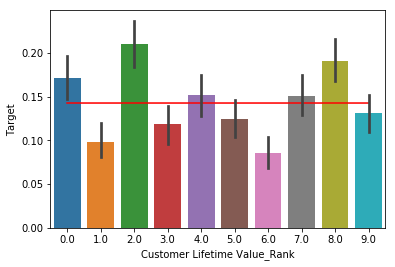

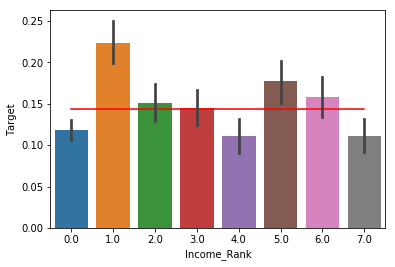

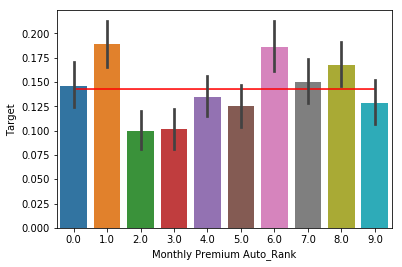

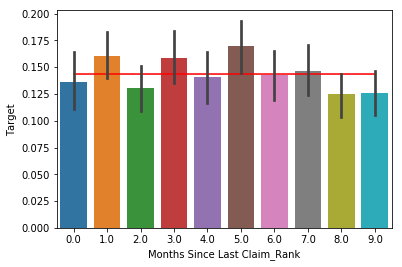

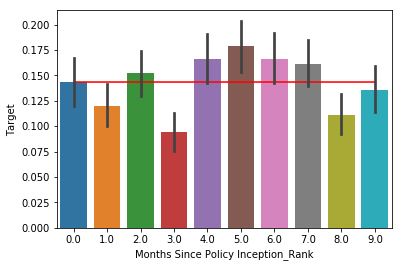

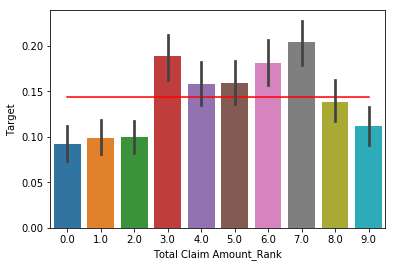

In [64]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_bin_combined['Target'].mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="Target",data=X_bin_combined, estimator=mean )
plt.show()

In [65]:
num_1.shape

(9134, 6)

# Part 3 - Select K Best

In [67]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=4)
selector.fit_transform(num_1, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]

In [68]:
select_features_df_num.dtypes

Customer Lifetime Value    float64
Income                     float64
Months Since Last Claim    float64
Total Claim Amount         float64
dtype: object

# Feature Selection - Categorical Features 

# Part 1 - Bi Variate Analysis

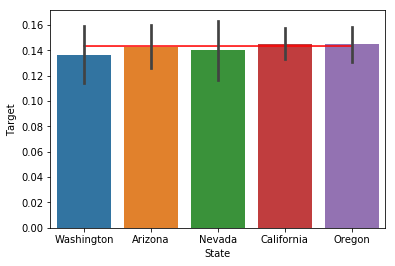

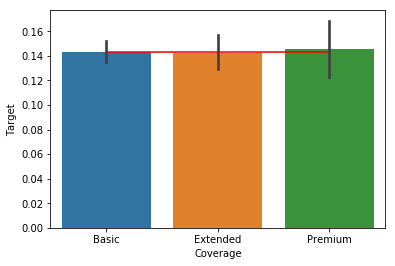

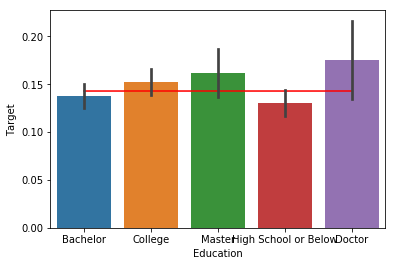

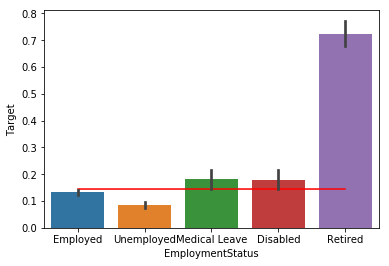

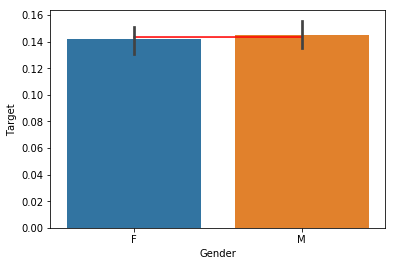

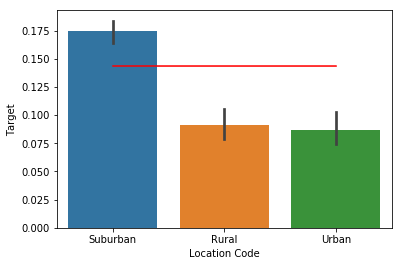

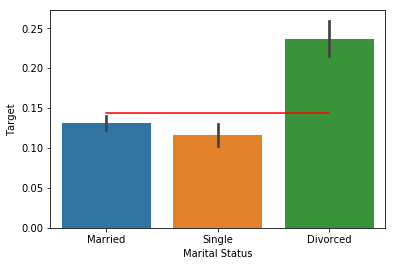

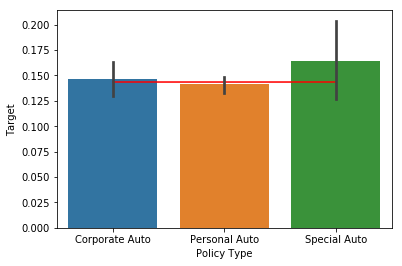

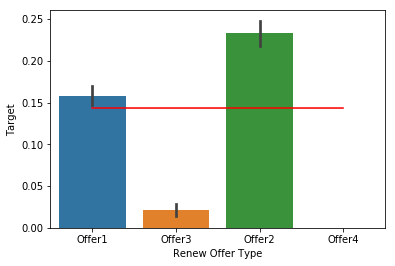

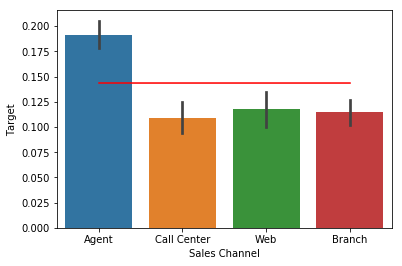

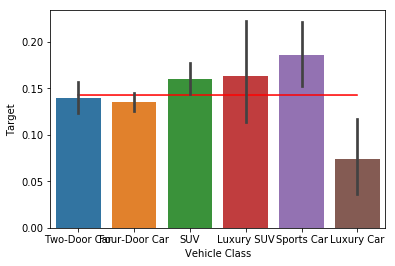

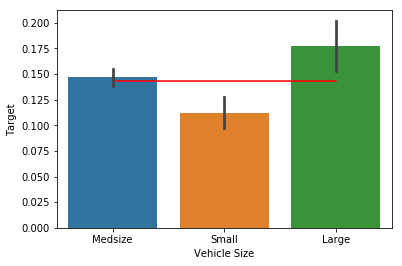

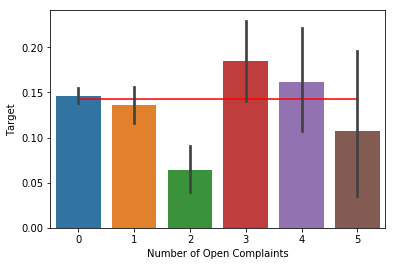

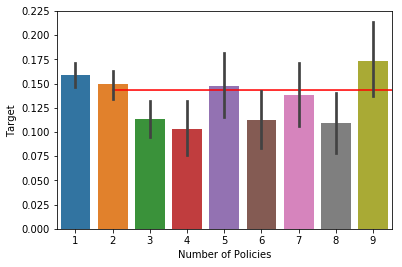

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_char_merged['Target'].mean(),data=X_char_merged,color='red')
    sns.barplot(x=col, y="Target",data=X_char_merged, estimator=mean )
plt.show()

In [75]:
char_var_list=['State','Coverage','Education','Gender','Policy Type','Number of Policies']
char_1=char.drop(char_var_list,axis=1)

In [76]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char_1, drop_first = True)
X_char_dum.shape

(9134, 26)

# Part 2 - Select K Best

In [77]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=24)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [78]:
select_features_df_char.dtypes

EmploymentStatus_Employed         uint8
EmploymentStatus_Medical Leave    uint8
EmploymentStatus_Retired          uint8
EmploymentStatus_Unemployed       uint8
Location Code_Suburban            uint8
Location Code_Urban               uint8
Marital Status_Married            uint8
Marital Status_Single             uint8
Renew Offer Type_Offer2           uint8
Renew Offer Type_Offer3           uint8
Renew Offer Type_Offer4           uint8
Sales Channel_Branch              uint8
Sales Channel_Call Center         uint8
Sales Channel_Web                 uint8
Vehicle Class_Luxury Car          uint8
Vehicle Class_Luxury SUV          uint8
Vehicle Class_SUV                 uint8
Vehicle Class_Sports Car          uint8
Vehicle Size_Medsize              uint8
Vehicle Size_Small                uint8
Number of Open Complaints_2       uint8
Number of Open Complaints_3       uint8
Number of Open Complaints_4       uint8
Number of Open Complaints_5       uint8
dtype: object

# Creating the Master Feature Set for Model Development

In [79]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

# Train Test Split

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [88]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (6393, 28)
Shape of Testing Data (2741, 28)
Response Rate in Training Data Target    0.143125
dtype: float64
Response Rate in Testing Data Target    0.143378
dtype: float64


In [89]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [90]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,EmploymentStatus_Employed,-0.498852
1,EmploymentStatus_Medical Leave,-0.037038
2,EmploymentStatus_Retired,0.704931
3,EmploymentStatus_Unemployed,-1.082730
4,Location Code_Suburban,0.365746
5,Location Code_Urban,-0.518385
6,Marital Status_Married,-0.863425
7,Marital Status_Single,-0.549518
8,Renew Offer Type_Offer2,0.860997
9,Renew Offer Type_Offer3,-0.942405


In [91]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [ ]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [60, 80, 100, 120, 140] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

In [92]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=7,min_samples_split=100)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=100, random_state=0)

In [ ]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

In [93]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=7,min_samples_split=100)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=100, random_state=0)

In [94]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
EmploymentStatus_Retired,0.323689
Renew Offer Type_Offer2,0.090740
Income,0.076512
Renew Offer Type_Offer3,0.072095
Total Claim Amount,0.066183
Customer Lifetime Value,0.064354
Renew Offer Type_Offer4,0.062836
Location Code_Suburban,0.035771
Months Since Last Claim,0.034762
Marital Status_Single,0.025908


In [95]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=7,min_samples_split=100)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=7, min_samples_split=100,
                           random_state=0)

In [96]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Customer Lifetime Value,0.236099
Income,0.162086
Total Claim Amount,0.157754
EmploymentStatus_Retired,0.140502
Months Since Last Claim,0.056900
Renew Offer Type_Offer2,0.052901
Renew Offer Type_Offer3,0.031763
Renew Offer Type_Offer4,0.017580
Location Code_Suburban,0.016348
Marital Status_Single,0.015991


In [97]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [98]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [99]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.8588106530463334
Precision 0.65
Recall 0.03307888040712468
f1_score 0.06295399515738498


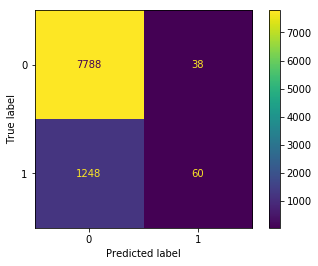

In [100]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [101]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.8766873403867201
Precision 0.7350427350427351
Recall 0.21882951653944022
f1_score 0.3372549019607843


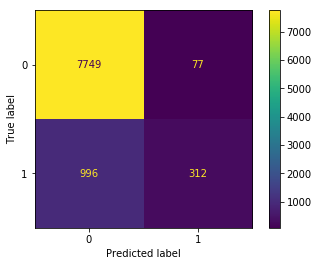

In [102]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [103]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.8708500547245531
Precision 0.782608695652174
Recall 0.13740458015267176
f1_score 0.2337662337662338


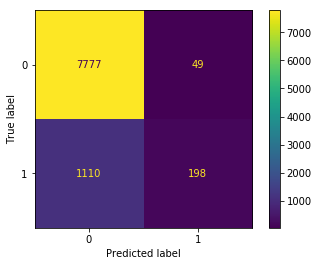

In [104]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [105]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.961327982488143
Precision 0.9135446685878963
Recall 0.806615776081425
f1_score 0.8567567567567568


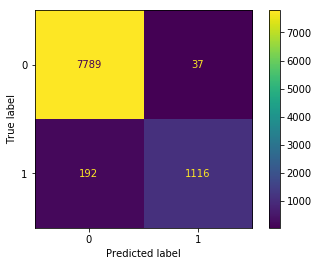

In [106]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [ ]:
# Lorenz Curve

In [112]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['Target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actual_event_rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sorted_reindexed['count'].cumsum()))
sorted_reindexed

,P_Rank_GBM,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile,Lift_over_Avg
0,10,914,0.975930,0.768720,892.0,892.0,0.681957,0.681957,22.0,22.0,0.002811,0.002811,0.6791,0.100066,0.100066,1,6.815095
1,9,913,0.455641,0.375047,416.0,1308.0,0.318043,1.000000,497.0,519.0,0.063506,0.066317,0.9337,0.099956,0.200022,2,3.181822
2,8,913,0.000000,0.129089,0.0,1308.0,0.000000,1.000000,913.0,1432.0,0.116662,0.182980,0.8170,0.099956,0.299978,3,0.000000
3,7,914,0.000000,0.074538,0.0,1308.0,0.000000,1.000000,914.0,2346.0,0.116790,0.299770,0.7002,0.100066,0.400044,4,0.000000
4,6,913,0.000000,0.047384,0.0,1308.0,0.000000,1.000000,913.0,3259.0,0.116662,0.416432,0.5836,0.099956,0.500000,5,0.000000
5,5,913,0.000000,0.029854,0.0,1308.0,0.000000,1.000000,913.0,4172.0,0.116662,0.533095,0.4669,0.099956,0.599956,6,0.000000
6,4,914,0.000000,0.017732,0.0,1308.0,0.000000,1.000000,914.0,5086.0,0.116790,0.649885,0.3501,0.100066,0.700022,7,0.000000
7,3,913,0.000000,0.010211,0.0,1308.0,0.000000,1.000000,913.0,5999.0,0.116662,0.766547,0.2335,0.099956,0.799978,8,0.000000
8,2,913,0.000000,0.005792,0.0,1308.0,0.000000,1.000000,913.0,6912.0,0.116662,0.883210,0.1168,0.099956,0.899934,9,0.000000
9,1,914,0.000000,0.002851,0.0,1308.0,0.000000,1.000000,914.0,7826.0,0.116790,1.000000,-0.0000,0.100066,1.000000,10,0.000000


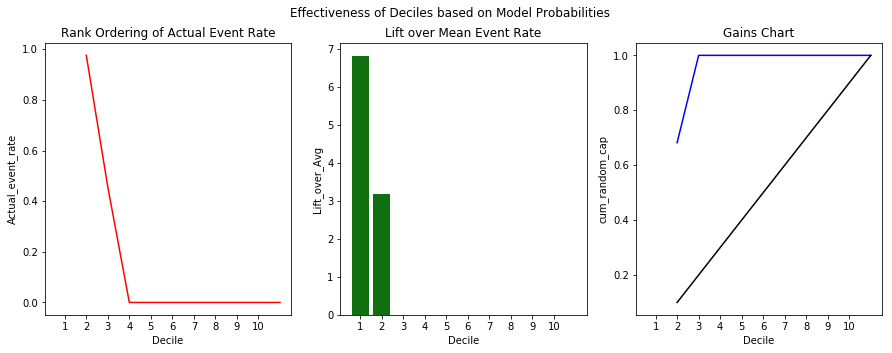

In [113]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle('Effectiveness of Deciles based on Model Probabilities')
axes[0].set_title('Rank Ordering of Actual Event Rate')
axes[1].set_title('Lift over Mean Event Rate')
axes[2].set_title('Gains Chart')
sns.lineplot(ax=axes[0],  x="Decile", y="Actual_event_rate", data=sorted_reindexed,color='red')
sns.barplot(ax=axes[1],  x="Decile", y="Lift_over_Avg", data=sorted_reindexed,color='green')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_event_cap", data=sorted_reindexed,color='blue')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_random_cap", data=sorted_reindexed,color='black')

In [ ]:
# Project Conclusion :- 
# The GBM Model has performed the best and we will use that model to build a strategy to target and prioritize 
# Clients for Policy Retention efforts and campaign
# A - Audience
# P - Prirotization
# T - Treatment

In [115]:
# Audience
df['Predicted_Renewal_Rank']=np.where(df['P_Rank_GBM']>8,"Top2","Bottom8")
df.Predicted_Renewal_Rank.value_counts()

Bottom8    7307
Top2       1827
Name: Predicted_Renewal_Rank, dtype: int64

In [118]:
df_top2=df.loc[df['Predicted_Renewal_Rank']=='Top2',:]
df_top2.shape

(1827, 24)

In [119]:
df_top2.dtypes

State                             object
Customer Lifetime Value          float64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Target                             int32
pred_prob                        float64
P_Rank_GBM                          int8
Predicted_Renewal_Rank            object
dtype: object

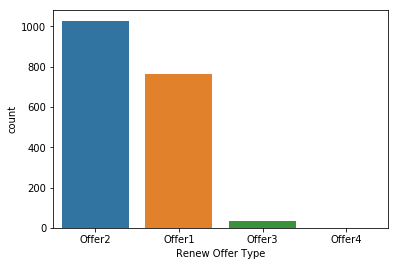

In [120]:
# Treatment Analysis
ax=sns.countplot(x='Renew Offer Type',data=df_top2)

In [121]:
df['lifetime_value_deciles']=pd.qcut(df['Customer Lifetime Value'].rank(method='first').values,10,duplicates='drop').codes+1

In [125]:
df.groupby('lifetime_value_deciles')['Customer Lifetime Value'].agg(['min','max','median'])

,min,max,median
lifetime_value_deciles,,,
1,1898.007675,2661.729688,2474.707319
2,2661.823510,3443.301126,2891.272351
3,3444.171166,4470.181084,3993.882994
4,4471.747876,5123.484988,4833.257382
5,5123.768112,5780.182197,5426.136238
6,5780.182197,7249.065093,6474.826466
7,7250.029606,8365.677648,7782.012669
8,8365.963454,10208.927610,8962.795984
9,10208.927610,15428.010440,12383.530600


In [126]:
df['Customer Lifetime Value'].median()

5780.182197

In [127]:
df['lifetime_value_segment']=np.where(df['lifetime_value_deciles']>=7,"High CLTV","Low CLTV")
df.lifetime_value_segment.value_counts()

Low CLTV     5480
High CLTV    3654
Name: lifetime_value_segment, dtype: int64

In [130]:
pd.crosstab(index=df['lifetime_value_segment'], columns=df['Renew Offer Type'],values=df['pred_prob'],aggfunc='mean')

Renew Offer Type,Offer1,Offer2,Offer3,Offer4
lifetime_value_segment,,,,
High CLTV,0.165091,0.216889,0.017829,0.006614
Low CLTV,0.157909,0.242979,0.032630,0.007146


In [131]:
pd.crosstab(index=df['lifetime_value_segment'], columns=df['Renew Offer Type'],values=df['pred_prob'],aggfunc='count')

Renew Offer Type,Offer1,Offer2,Offer3,Offer4
lifetime_value_segment,,,,
High CLTV,1737,1015,563,339
Low CLTV,2015,1911,869,685


In [ ]:
# Prioritization Strategy

# Provide Offer 2 to 1015 High CLTV Customers - Phase 1
# Provide Offer 1 to 1737 High CLTV Customers - Phase 2

# Provide Offer 2 to 1911 High CLTV Customers - Phase 3
# Provide Offer 1 to 2015 High CLTV Customers - Phase 4

In [ ]:
# PROJECT CONCLUSION:-

# By leveraging Machine Learning algorithms, we are able carve out a basic strategy that can be used to ehance renewal rates 
# in the Auto Insurance portfolio. For this purpose, we used the APT framework to translate the model output into a strategy